## Importing the necessary packages

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

## Dataset
In this notebook we'll wprk with mnist digit classification dataset to come up with a CNN that can recognise which digit it's looking at, hopefully with a high level of accuracy

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

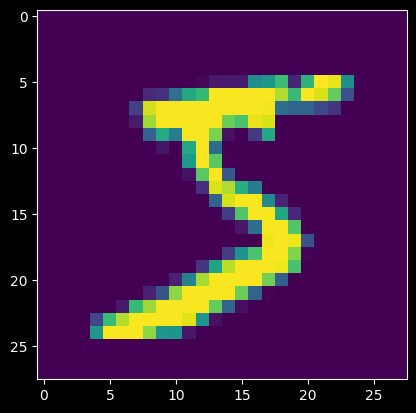

In [4]:
plt.imshow(train_images[0])

## Defining the CNN

The CNN we'll be defining will have 2 convolutional layers and 2 pooling layers followed by 2 completely connected layers.

We're aware of the fact that our input will be images of size 28x28 pixels. To make use of the information that spatial structure of an image provides us, we use of the convolutional layers. 

Convolutional layers work on patches of the image independently using appropriate filters to extract features. This is where the concept of tensors becomes really useful in mathematically representing the image and filters.

This is followed by pooling which basically downscales the image while maintaining the features. So now we have gotten rid of the clutter and can feed this into our deep feed forward neural network which will perform the desired task(in this case, recognising the digit).

In [20]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        #first convolutional layer
        #32 is the number of filters. It indicates the number of features that you'll be looking for
        tf.keras.layers.Conv2D(32, 3, activation = "relu"),

        #first pooling layer
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

        #second convolutional layer
        #Here we have 64 filter, this helps us look for more features in a downscaled image. Pretty effective
        tf.keras.layers.Conv2D(64, 3, activation = "relu"),

        #second pooling layer
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

        #The feed forward neural network
        #Flatten loses all spatial data because the NN takes in vectorial input
        tf.keras.layers.Flatten(),
        #In this one, we have 128 perceptrons receiving all 784(28x28) inputs
        tf.keras.layers.Dense(128, activation = "relu"),
        #The last layer is usually a softmax funtion for probabilitic outputs
        #The 10 perceptrons here are equal to the number of output classes(0 to 9)
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
    return cnn_model

cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])

print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

## Training the CNN

We will now compile our CNN and train it over the training data.

We will be using the adam optimizer

In [21]:
cnn_model = build_cnn_model()
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss = "sparse_categorical_crossentropy",
                    metrics = ["accuracy"])

In [22]:
cnn_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 32s 34ms/step - loss: 0.1603 - accuracy: 0.9514
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0492 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0193 - accuracy: 0.9940


## Evaluating accuracy of the model against test data

In [27]:
print("Test accuracy:{} %".format(cnn_model.evaluate(test_images, test_labels)[1]*100))

313/313 [==============================] - 3s 9ms/step - loss: 0.0311 - accuracy: 0.9891
Test accuracy:98.90999794006348 %


## Making predictions on the test data using the CNN

Label of this digit is: 7


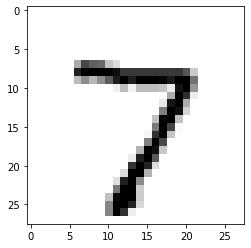

In [35]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

### Doing it all over again, but this time manually

The .fit() method abstracts the whole process of training the neural network and works great for fairly simple tasks like the one we have here. But in certain situations, it helps to do it manually with a lot more control over the process.

For this, learn how to use tf.GradientTape() etc.